<a href="https://colab.research.google.com/github/Sharma-Pranav/DeepLearning/blob/master/Basic_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [0]:
data = datasets.load_digits()

In [0]:
X_data = data.images
Y_data = data.target

In [5]:
print(X_data.shape)

(1797, 8, 8)


In [0]:
#Reshape data for Tensorflow Backend input format

X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2],1))

#One Hot Encoding
Y_data = to_categorical(Y_data)

In [0]:
#Split data into train and test data

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2)


In [0]:
model = Sequential()

model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 19, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())

model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [0]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])

In [14]:
train_history = model.fit(X_train, Y_train, batch_size = 50, validation_split = 0.1, epochs = 100, verbose = 0)

Instructions for updating:
Use tf.cast instead.


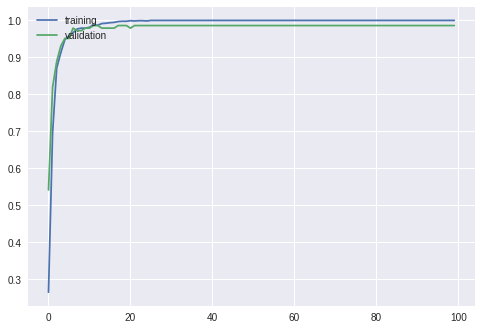

In [15]:
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [16]:
results = model.evaluate(X_test, Y_test)

360/360 [==============================] - 0s 50us/step


In [17]:
print('Test_Accuracy', results[1])

Test_Accuracy 0.975
